# Plots with matplotlib
In this notebook, we introduce how to make plots in Python with Matplotlib. Matplotlib is the main library for graphics in Python. Starting from the data which have introduced in the xarray notebook, we show:
1. The basic skeleton of a matplotlib figure
2. The different types of plots available
3. How to superimpose and label different graphics
4. How to make figures with different subplots

Go through the notebook and try to understand what each command does. Do not hesitate to comment or change some parts to see how the plot is changing. You can also try to make your own graphics as you like. 
The exercises in the end are examples of figures to reproduce with a few guidelines. 

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt

# Other packages
import numpy as np
import xarray as xr

In [2]:
# As an example, we will extract again the time series of temperature over Oxford
ds = xr.open_dataset("../../data_samples/netcdf/E-OBS/UK_monthly.nc") # Open the dataset
T = ds.tg # Select the temperature variable
T_Oxford_monthly = T.interp(latitude = 51.75, longitude = -1.26,) # Interpolate the data for Oxford
T_Oxford_yearly = T_Oxford_monthly.groupby("time.year").mean()

In [3]:
T_Oxford_yearly

<xarray.DataArray 'tg' (year: 74)> Size: 592B
array([ 9.57385451,  9.45716131,  9.28786862,  9.82251087,  9.38056811,
        9.40707291,  8.90033994, 10.22919159,  9.65734402, 10.57939694,
        9.6941008 ,  9.98651607,  8.37840482,  8.20914532,  9.36935579,
        8.7981575 ,  9.44143356,  9.65541055,  9.20490952,  9.32140655,
        9.62101198,  9.5774089 ,  9.20072789,  9.45338694,  9.4919835 ,
        9.91363362, 10.07627932,  9.39770206,  9.30389503,  8.87431287,
        9.40729577,  9.26275452,  9.92047667, 10.13252289,  9.79003459,
        8.87024329,  8.78820296,  9.09609425,  9.71591251, 10.69304996,
       10.73995263,  9.48989678,  9.92342031,  9.61812767, 10.45169659,
       10.67523922,  9.32625896, 10.73266951, 10.52732808, 10.7079634 ,
       10.5597348 , 10.20499482, 10.93088704, 10.72953655, 10.84425823,
       10.86921109, 11.31483689, 10.87588221, 10.39480023, 10.67462617,
        9.51924105, 11.2204812 , 10.30797109,  9.97524742, 11.37633603,
       10.89289663, 10.75903792, 11.03844018, 11.13082203, 10.85218327,
       11.30423848, 10.70069896, 11.70841711, 11.43977229])
Coordinates:
    latitude   float64 8B 51.75
    longitude  float64 8B -1.26
  * year       (year) int64 592B 1950 1951 1952 1953 ... 2020 2021 2022 2023
Attributes:
    standard_name:  air_temperature
    long_name:      mean temperature
    units:          Celsius
    cell_methods:   time: mean

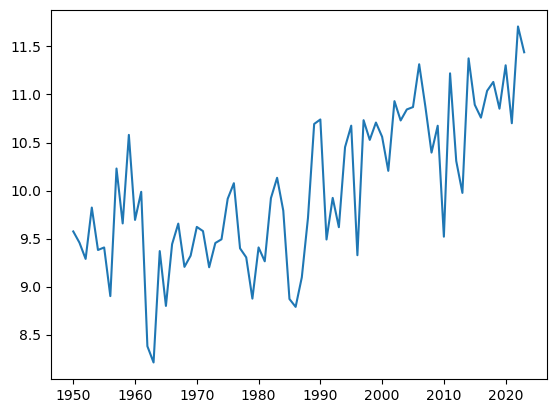

In [4]:
# Matplotlib can be used to create plots very rapidly in one line. For example, let us plot this time series:
plt.plot(T_Oxford_yearly.year, T_Oxford_yearly)
# However, this is somewhat redundant with the quick plot functions we have seen built-in pandas and xarray, 
# which is why we will focus here on building complete plots that can be complexified if necessary.

## 1. Skeleton of a matplotlib figure

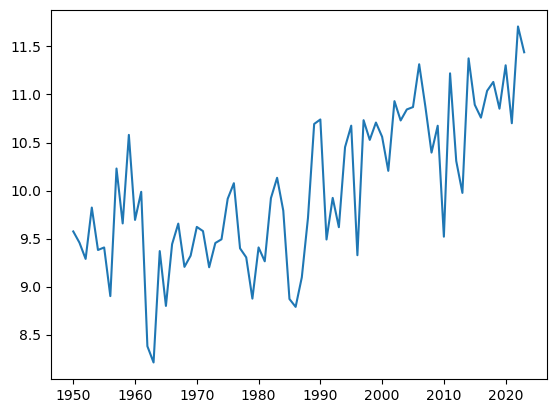

In [5]:
# Here is the basic structure of a plot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.plot(T_Oxford_yearly.year, T_Oxford_yearly) # Plot the time series

## Potentially add some customizations here

## Show
plt.show()
# NB: plt.show() is not necessary in jupyter notebook, but it will be if you use the python terminal

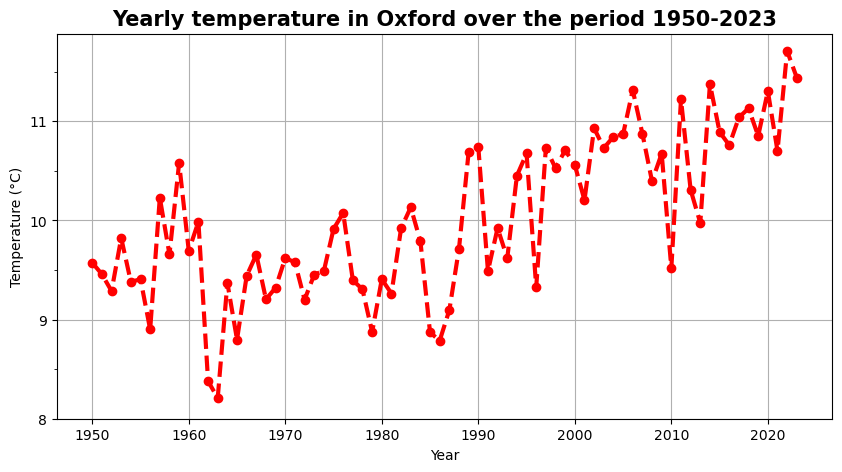

In [6]:
# Let us show some example of how you can customize this basic plot
## Setup the figure
fig = plt.figure(figsize = [10,5]) # Change the figure size with figsize = [width, height]
ax = plt.axes() 

## Add the graphics
ax.plot(T_Oxford_yearly.year, T_Oxford_yearly, 
       color = "red", linewidth = 3, linestyle = "--", # Change line color, width and style
       marker = 'o', # Add markers for data points 
       )

## Customizations
### Labels
ax.set_xlabel("Year") # Add a label for the x-axis
ax.set_ylabel("Temperature (°C)") # Add a label for the y-axis
ax.set_title("Yearly temperature in Oxford over the period 1950-2023", # Add a title
            fontsize = 15, fontweight = "bold") # Make the title font 15pt and bold
### Axes
ax.set_xticks(np.arange(1950,2025,10)) # Ticks for x-axis: Every ten years
ax.set_yticks(np.arange(8,12,1)) # Major ticks for y-axis: Every °C
ax.set_yticks(np.arange(8.5,12,1), minor = True) # Minor ticks for y-axis: Half °C
ax.grid() # Add grid

## Show
plt.show()

This figure summarizes many types of customizations (source: https://matplotlib.org/stable/users/explain/quick_start.html#quick-start)

<img src="anatomy.webp" style="width: 500px;"/>

In [7]:
# Now try to customize it yourself: Change the figure size, the color, the labels...
# ...


## 2. Different types of plot for 1D data

### Pairwise data

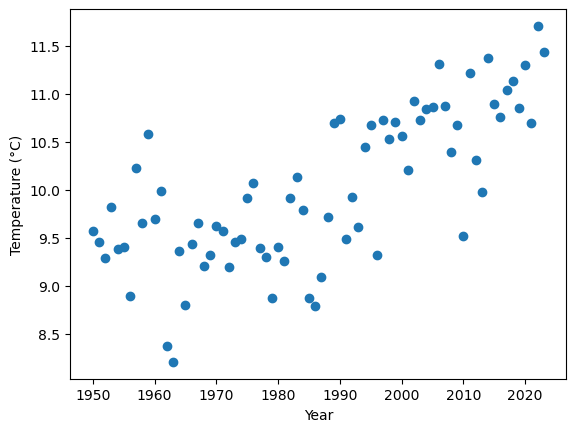

In [8]:
# scatterplot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.scatter(T_Oxford_yearly.year, T_Oxford_yearly) # Plot the time series as scatter

# Customize
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (°C)")

## Show
plt.show()

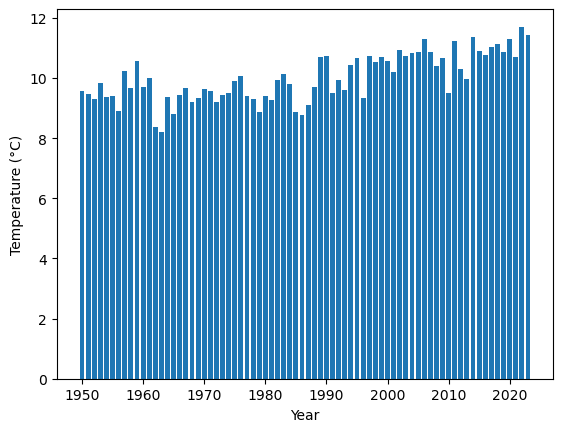

In [9]:
# barplot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.bar(T_Oxford_yearly.year, T_Oxford_yearly) # Plot the time series as barplot

# Customize
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (°C)")

## Show
plt.show()

### Statistical distributions

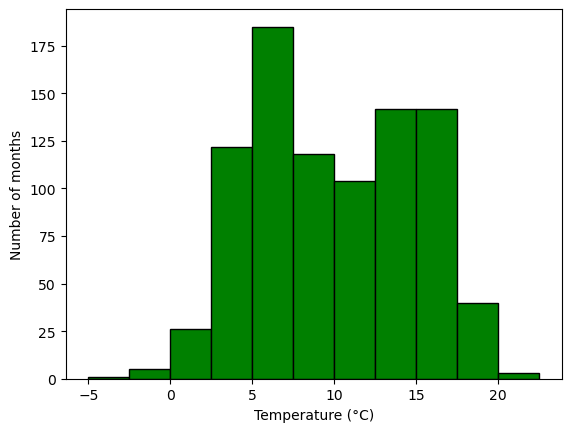

In [10]:
# histogram
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.hist(x = T_Oxford_monthly, # Plot the histogram
        bins = np.arange(-5,25,2.5), # Optionnal: You can define the bins to be used
        color = "green", edgecolor = 'k') # Customize: Change face and edge colors


# Customize
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Number of months")

## Show
plt.show()

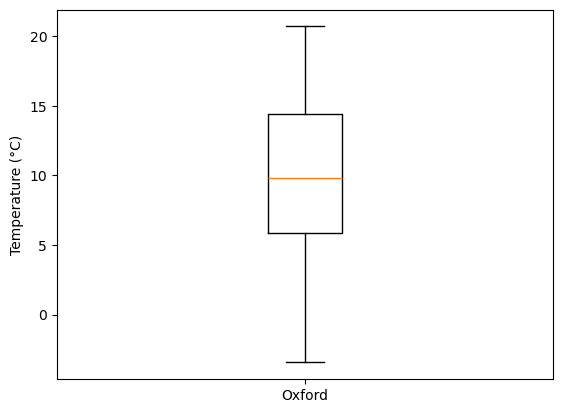

In [11]:
# Boxplot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.boxplot(x = T_Oxford_monthly) # Plot the distribution

# Customize
ax.set_ylabel("Temperature (°C)")
ax.set_xticks([1], ["Oxford"])

## Show
plt.show()

Explore other types of plots on this page : https://matplotlib.org/stable/plot_types/index.html

## 3. Several data lines on the same plot

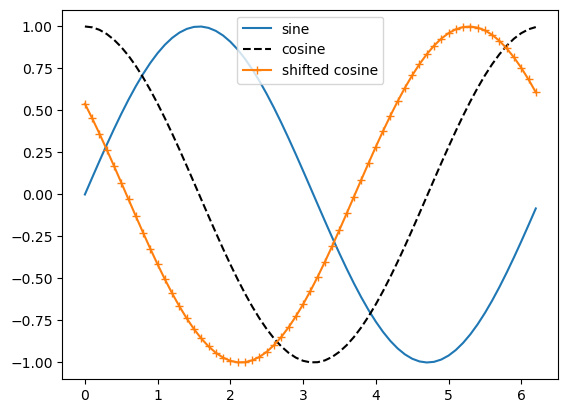

In [13]:
# Data generation
X = np.arange(0, 2*np.pi, 0.1)
sin = np.sin(X)
cos = np.cos(X)
cos_shifted = np.cos(X+1)

## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.plot(X, sin, # Provide coordinates
        label = "sine", # provide label for legend
        )
ax.plot(X, cos, label = "cosine", # Coordinates, labels
        color = "black", linestyle = "--", # line customization
       )
ax.plot(X, cos_shifted, label = "shifted cosine", 
        marker = "+", # Add markers
       )
ax.legend() # Displey the legend based on the provided labels

## Show
plt.show()

## 4. Subplots
Sometimes, you will want to have several panels on the same figure, this is done using "subplots".

In [14]:
# Data preparation
ds = xr.open_dataset("../../data_samples/netcdf/E-OBS/UK_monthly.nc") # Open the dataset
T = ds.tg # Select the temperature variable
T_Oxford = T.interp(latitude = 51.75, longitude = -1.26,).groupby("time.year").mean() # Interpolate the data for Oxford and average over years
precip = ds.rr # Select the precip variable
precip_Oxford = precip.interp(latitude = 51.75, longitude = -1.26,).groupby("time.year").mean() 
P = ds.pp # Select the pressure variable
P_Oxford = P.interp(latitude = 51.75, longitude = -1.26,).groupby("time.year").mean() # Interpolate the data for Oxford

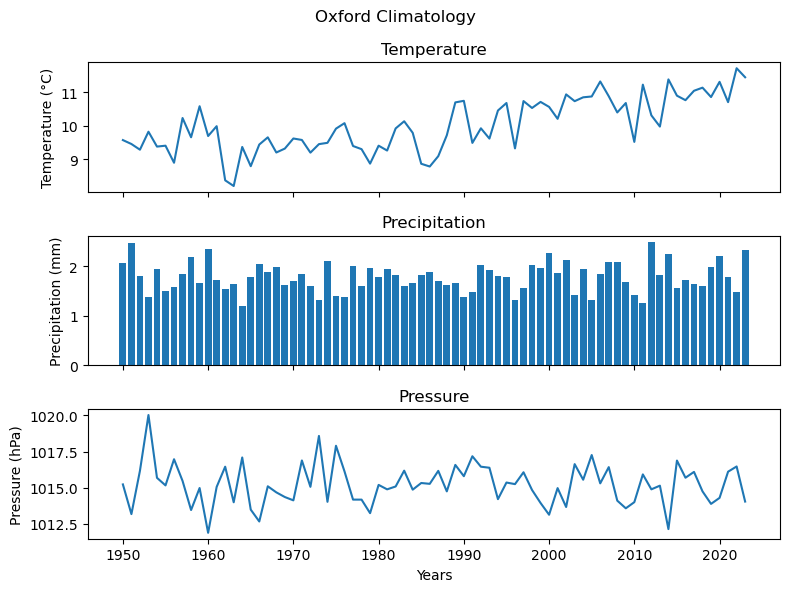

In [22]:
## Setup the figure
fig, axs = plt.subplots(3, # Create a subplot grid with 3 lines
                        sharex = True, # Make them share their x-axis
                       figsize = (8,6), # Change figure size
                       )

## Add the graphics
axs[0].plot(T_Oxford.year, T_Oxford)
axs[1].bar(precip_Oxford.year, precip_Oxford)
axs[2].plot(P_Oxford.year, P_Oxford)

## Customize
### Axes labels
axs[0].set_ylabel("Temperature (°C)")
axs[1].set_ylabel("Precipitation (mm)")
axs[2].set_ylabel("Pressure (hPa)")
axs[2].set_xlabel("Years")
### Subplots titles
axs[0].set_title("Temperature")
axs[1].set_title("Precipitation")
axs[2].set_title("Pressure")
### Figure-level labels
fig.suptitle("Oxford Climatology")
### tight_layout: When a figure contains many elements, tight_layout makes sure none of them are superimposed.
plt.tight_layout()

## Show
plt.show()

## Summary
These "cheatsheets" from https://matplotlib.org/cheatsheets/ summarize what we have seen (You can find them and others in the folder to save them): 
<img src="handout-beginner.webp" style="width: 1200px;"/>
<img src="handout-intermediate.webp" style="width: 1200px;"/>

Matplotlib is very powerful and can do many many things, more than we can cover. If you find yourself willing to do something that you don't know how to, here are some resources you can look for:
* The matplotlib documentation: https://matplotlib.org/stable/ When looking for a particular type of plot or customization, look out for the demo and examples, which are usually very instructive.
* Google (which will often redirect you to Stack Overflow)
* ChatGPT (Or, I suppose, any LLM)

Using solutions from ChatGPT or Stack Overflow will usually work especially if you are in a rush. However, in the long run, it is worth learning how matplotlib fundamentally works by using the documentation. 

## Exercises
For each exercise, a figure is shown that you have to reproduce with some clues. Solutions are provided in a separate notebook. Note that there may be several ways to do one thing, so if you did not do as in the solution but got the same plot, well done!

### Level 1
<img src="examples/level1.png" style="width: 600px;"/>

In [16]:
# Level one
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Create the axes

# Plot the data 

# Customize the plot


### Level 2
<img src="examples/level2.png" style="width: 600px;"/>

Help:
* Linestyles: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
* Colors: https://matplotlib.org/stable/gallery/color/named_colors.html

In [15]:
# Data for plotting
t = np.arange(0.0, 10.0, 0.01)
s = np.sin(2 * t)

# Create the axes

# Plot the data: Customize linestyle and color

# Customize the plot 
## Axes labels

## Title (font size is 15pt, color is red)

## xticks every pi (character: π)

## Display grid

### Level 3
<img src="examples/level3.png" style="width: 600px;"/>

* Rendering maths in matplotlib: https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html
* Text function: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

In [17]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

# Create the axes

# Plot the data

# Add some text: Hello World at coordinates x = 0, y = -1, with font 15pt with the text function

# Add latex in the title with fontsize 20pt

# Axes labels

# Level 4
<img src="examples/level4.png" style="width: 600px;"/>

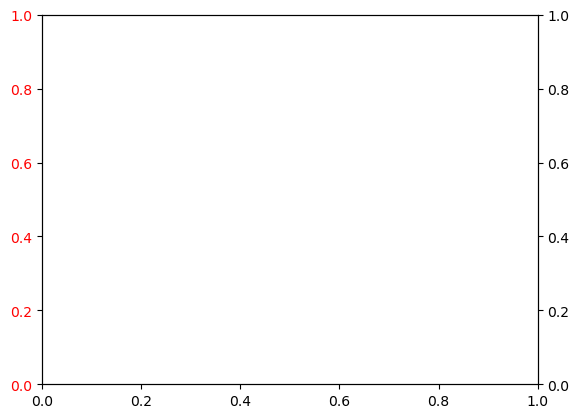

In [19]:
# Data for plotting
t = np.arange(0.01, 10.0, 0.01)
e = np.exp(t)
s = np.sin(2 * np.pi * t)

# Create the axes
ax1 = plt.axes()

# Plot the exponential on ax1 in red

# Twin ax1 into ax2
ax2 = ax1.twinx()  

# Plot the sinus on ax2 in blue

# Label the axes

# Color the ticks
ax1.tick_params(axis='y', labelcolor="red")


# Set the title

# Level 5
<img src="examples/level5.png" style="width: 600px;"/>

* Matplotlib legend documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html


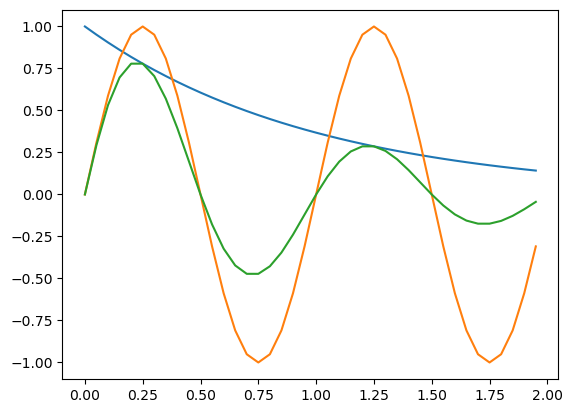

In [27]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.05)
y1 = np.exp(-t)
y2 = np.sin(2 * np.pi * t)
y3 = np.exp(-t) * np.sin(2 * np.pi * t)

# Create axes
ax = plt.axes()

# Plot the data: Add the styles
l1 = ax.plot(t, y1, )
l2 = ax.plot(t, y2, )
l3 = ax.plot(t, y3, )

# Add the legend

# Add labels

# Level 6
<img src="examples/level6.png" style="width: 600px;"/>

* Subplots demo: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-demo-py 

In [30]:
# Data for plotting
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Create figure with two rows of three subplots, sharing x-axis, in a figure of size [10,4]

# Plot the data on the axes

# Subplot titles

# Figure title

# Save and show
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Level 7
<img src="examples/level7.png" style="width: 600px;"/>

* Matplotlib axes scale: https://matplotlib.org/stable/users/explain/axes/axes_scales.html
* set_yscale documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html

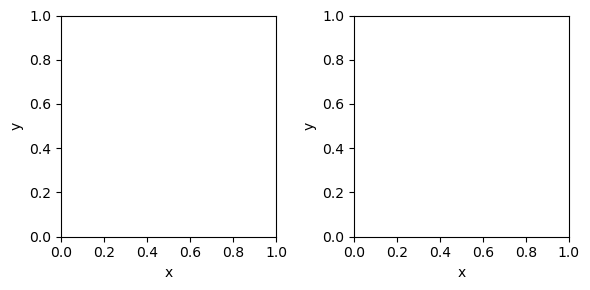

In [28]:
# Data for plotting
t = np.arange(0.0, 10.0, 0.05)
e = np.exp(t)

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize = [6,3]) # Two columns of one subplot

# Plot the data on both axes

# Set the y-axis of the second subplot as log

# Add labels to both subplots
for i in range(len(axs)):
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')

# Subplot titles

# Figure title


# Save and show
plt.tight_layout()
plt.show()

# Level 8
<img src="examples/level8.png" style="width: 600px;"/>

* Using numpy.where to mask values: https://numpy.org/doc/2.0/reference/generated/numpy.where.html

In [31]:
# Data for plotting
x = np.linspace(0, 30, 2000)
signal = 1.2*np.sin(x)

# Create axes

# Mask
pos_signal = np.where(signal>=0, signal, np.nan)
neg_signal = np.where(signal<=0, signal, np.nan)

# Plotting with linewidth=3

# Customize

# Save and show
plt.show()

# Level 9
<img src="examples/level9.png" style="width: 600px;"/>

In [32]:
# Data for plotting
T_Jan = T_Oxford_monthly.where(T_Oxford_monthly.time.dt.month == 1, drop = True) # Select the temperature for the months of January only

# Create axes

# Plot the temperature with coloring

# Labels 

# Save and show
plt.show()

# Level 10
<img src="examples/level10.png" style="width: 1500px;"/>

In [ ]:
import matplotlib.ticker as ticker

# Data for plotting
p95 = np.percentile(T_Oxford_monthly, 98)
p5 = np.percentile(T_Oxford_monthly, 2)

# Create figure of size [15,4] and axes

# Plot Oxford monthly temperature data

# Add points for extreme temperatures

# Labels axes

# Add info about records

# Setup axes

# Legend

# Title

# Save and show
plt.tight_layout()
plt.show()